<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

<h1 align=center><font size = 5> Principal Component Analysis (PCA) in R </font></h1>

### Exercise:

In this exercise, we will be using the <font color = "green">credit_Fraud.csv</font> data set. This dataset contains various information on the credit history of customers of a financial institution.

The objective of this exercise is to use principal component analysis to reduce the number of features of the dataset into a smaller set of linearly uncorrelated features (principal components).

#### Load the data

In [1]:
data <- read.csv("https://ibm.box.com/shared/static/78g5lc5krkvclwbnxi6zodemlktr9v9r.csv", header=T)
head(data)

over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,none,...,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good


### Data description
Data is provided in its original form using .arff file which is a complete package with meta-data of the data in it; In this data there are 7 numerical variable: **credit_usage, current_balance, cc_age, residence_since, num_dependence, existing_credit, location**

In [2]:
# get the list of column index that are numeric
numvec=c();
for( i in 1:ncol(data)){
    if ( is.numeric(data[,i])) numvec = append(numvec,i)
}
cat('Numeric columns # ', numvec, "\n")

Numeric columns #  2 5 8 11 13 16 18 


In [3]:
# let subset the numeric variable and plots the box plots to see their distribution approximately
datn = data[,numvec]

head(datn)

credit_usage,current_balance,location,residence_since,cc_age,existing_credits,num_dependents
6,1169,4,4,67,2,1
48,5951,2,2,22,1,1
12,2096,2,3,49,1,2
42,7882,2,4,45,1,2
24,4870,3,4,53,2,2
36,9055,2,4,35,1,2


** Question 1**

Do we need to standardize ( location and scale) ? or do we need any kind of transformation before doing location/scale standardization ?

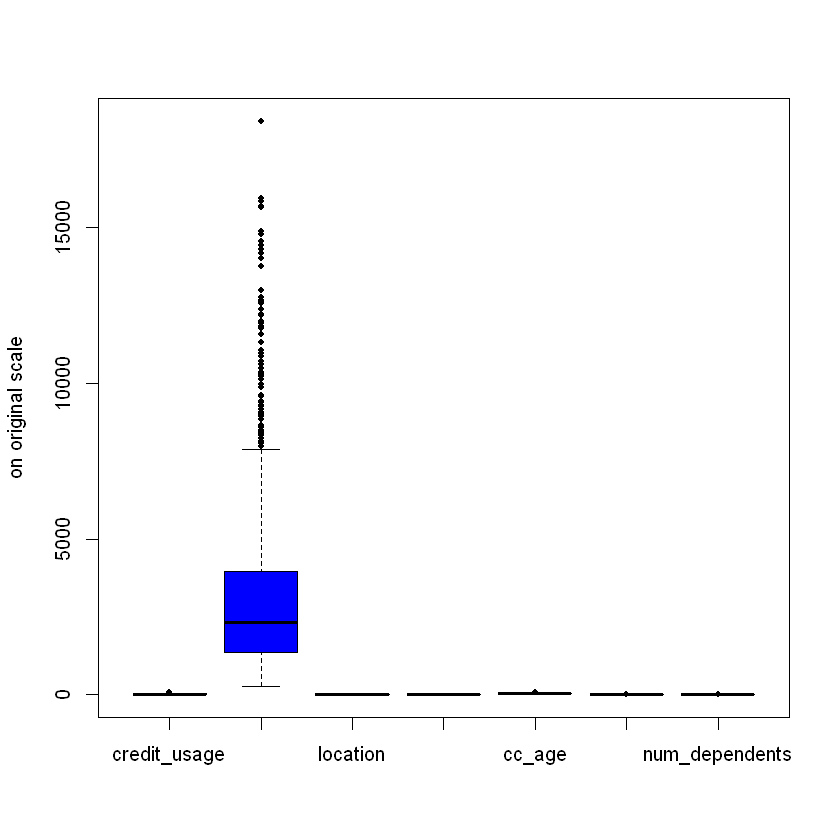

In [4]:
# NOTE: that the distribution of variables are pretty skewed and transformation is needed in order to
#       make them comparable to plot, so instead of transforming each variable we transform the y-axis here
boxplot(datn,col="blue",pch=20, ylab="on original scale")








<div align="right">
<a href="#p1" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p1" class="collapse">
```
# NOTE: that the distribution of variables are pretty skewed and transformation is needed in order to
#       make them comparable to plot, so instead of transforming each variable we transform the y-axis here
boxplot(datn,col="blue",pch=20, ylab="on original scale")
```
</div>

**Answer**

As you can see from the plot above, one of the variables **current_balance** has larger values and a wider spread compared to the other variables so scaling would be necessary.

**Question 2**

How can we reduce these 7 features into a smaller number of features, such that at least 60 to 70% of the variability is explained by these newly obtained features; thus reducing the size of the data, also known as dimensionality reduction?

In [5]:
# Perform a principal component analysis on the data and print the results
pcasolutions = prcomp(datn, center=TRUE, scale=TRUE)

print(pcasolutions)







Standard deviations (1, .., p=7):
[1] 1.2879452 1.1885081 1.0574414 0.9690846 0.9317761 0.8489181 0.5314789

Rotation (n x k) = (7 x 7):
                         PC1         PC2         PC3         PC4          PC5
credit_usage      0.65736202 -0.03735636 -0.31775828 -0.19773014  0.135530026
current_balance   0.71798901 -0.01191887  0.06012084  0.03432009 -0.045923638
location         -0.21779725  0.11954692 -0.74516771 -0.43308436  0.288629046
residence_since   0.05945153  0.54215383 -0.22225264  0.49320457 -0.002427909
cc_age            0.01400469  0.62295066 -0.05735579  0.24334149  0.043586135
existing_credits  0.02018892  0.43811021  0.14284049 -0.59059501 -0.648812466
num_dependents    0.02816216  0.33201222  0.51676970 -0.34769896  0.688006282
                         PC6         PC7
credit_usage      0.02986839 -0.63808435
current_balance  -0.08035275  0.68628842
location         -0.01374835  0.33457461
residence_since   0.63999985  0.01679433
cc_age           -0.73382541 -0.09

<div align="right">
<a href="#p2" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p2" class="collapse">
```
# Perform a principal component analysis on the data and print the results
pcasolutions = prcomp(datn, center=TRUE, scale=TRUE)

print(pcasolutions)
```
</div>

In [6]:
 ## check  you answers:
options(warn=-1)
if ( length(pcasolutions$scale)==1 & !(pcasolutions$scale)) { 
    cat(" Scaling of variables is necessary here, ... did you make use of \"scale=TRUE\" option ? ")
}else{
    cat(" passed ....")
}

options(warn=0)

 passed ....

Create a scree plot and apply the Kaiser-Gutmann cutoff rule

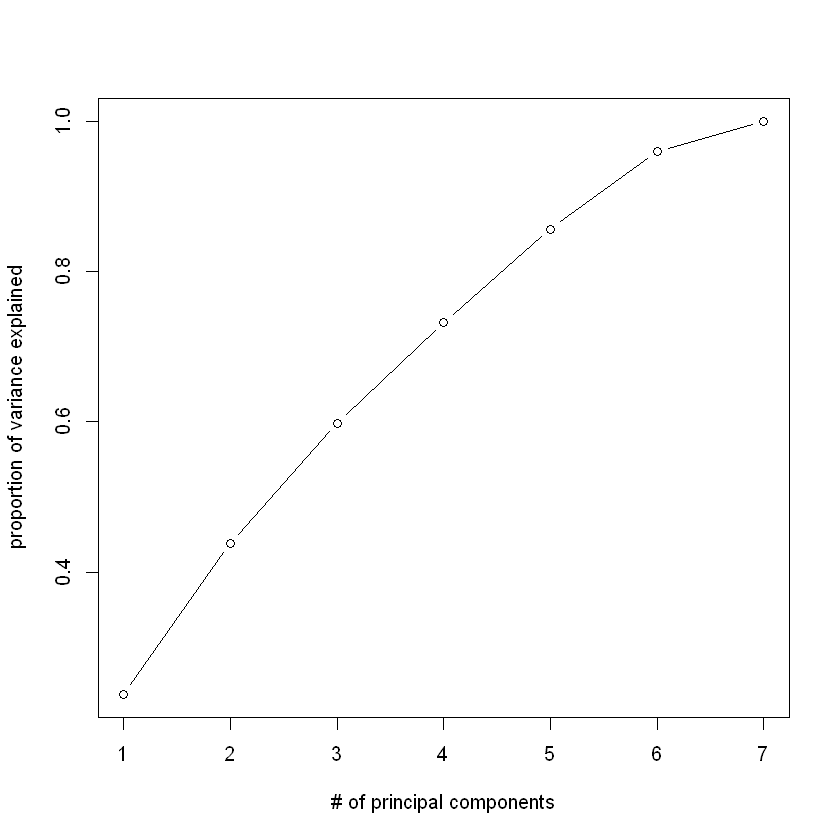

In [7]:
#eigen-values : 
eigenvalues = pcasolutions$sdev**2

# cumulative proportion of variance explained by each principal component:
prop = cumsum(eigenvalues)/sum(eigenvalues)

plot(prop, type="b", ylab="proportion of variance explained", xlab="# of principal components")







<div align="right">
<a href="#p3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p3" class="collapse">
```
#eigen-values : 
eigenvalues = pcasolutions$sdev**2

# cumulative proportion of variance explained by each principal component:
prop = cumsum(eigenvalues)/sum(eigenvalues)

plot(prop, type="b", ylab="proportion of variance explained", xlab="# of principal components")
```
</div>

**Answer 2**

The first three principal components explain 60% of the variablity. 

### Question 3. Complete the following Tasks:
##### a.  Look at the scree plot and compare it with the proportion of variance explained plot to see what % of variance is explained. Let "k" be the number of principal components you decide to take
##### b.  Plot the principal components and check how they align with the variable $class$  (indicating credit score) is spread around by colouring them green for $good$ and blue for $bad$

In [ ]:
## Your Answer Code Here ## 
# a. #taking a look at the first three PCs 
rotated_data = pcasolutions$x[,1:3]
head(rotated_data)







<div align="right">
<a href="#p4" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p4" class="collapse">
```

# taking a look at the first three PCs 
rotated_data = pcasolutions$x[,1:3]
head(rotated_data)
```
</div>

Here we want to look at the weights, aka factor loadings, associated with each of the original dimensions for our selected # of principal components. 

In [8]:
## Your Answer Code Here ## 
# b. # Rotation gives you the factor loadings # 
eigenvectors = pcasolutions$rotation[,1:3]





<div align="right">
<a href="#p5" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p5" class="collapse">
```
# Rotation gives you the factor loadings # 
eigenvectors = pcasolutions$rotation[,1:3]
```
</div>

In [9]:
options(warn=-1)
if ( all(dim(eigenvectors) == c(ncol(datn),3) )){
    if ( round(eigenvectors[1,1],4) == 0.6574 & round(eigenvectors[2,1],4) ==0.7180 )
    cat("Passed !!\n")
    
}else{
    cat("NOTE: perhaps you want to go back and check the creation of the PCAs? \n")
}

options(warn=0)

Passed !!


#### Plot...
Let's plot the transformed data in 2D and 3D to see if we can find segregation of the data.
Also, let's look at the correlation between the principal components obtained using numeric data and the categorical variables we had in our data.
Note that there are 14 categorical variable you can choose to replace **catcol** in the code below by each of the variables to see if you see any segregation of the colours. If the categorical column is correlated to any of PC then you would see some kind of segregation depending on the magnitude of correlation.
Also, feel free to change column name below for **catcol** and see the different plots generated.


In [10]:
# some colouring based on other categorical variables;
catcol = 'class'
colcolumn  = data[,catcol]
l1 = levels(colcolumn)
colpalatte = c('green','blue', 'cyan')
mycol =colpalatte[as.numeric(colcolumn)]
head(mycol)

[1] "blue"  "green" "blue"  "blue"  "green" "blue"

In [11]:
install.packages("plot3D")
library(plot3D)

plot(rotated_data[,1],rotated_data[,2],pch=20, col=mycol, xlab="First PC", ylab="Second PC",
    main=paste('Plot of First 2 PC (colour by :',catcol, ")"))
legend(3.6,4, legend =l1, pch=20, col=colpalatte[1:length(l1)])

plot(rotated_data[,2],rotated_data[,3],pch=20, col=mycol, xlab="Second PC", ylab="Third PC",
    main=paste('Plot of 2nd and 3rd PC (colour by :',catcol, ")"))
legend(3,3.5, legend =l1, pch=20, col=colpalatte[1:length(l1)])

also installing the dependency 'misc3d'




  There are binary versions available but the source versions are later:
       binary source needs_compilation
misc3d  0.9-0  0.9-1             FALSE
plot3D    1.3    1.4             FALSE



installing the source packages 'misc3d', 'plot3D'



ERROR: Error in plot(rotated_data[, 1], rotated_data[, 2], pch = 20, col = mycol, : object 'rotated_data' not found


In [13]:
# Install and load the plot3D library
install.packages("plot3D")
library(plot3D)

# Generate some sample data
set.seed(123)
data <- matrix(rnorm(100*3), ncol=3)

# Rotate the data
rotated_data <- varimax(data)$rotation

# Create a vector of colors to use for the points in the plot
colors <- rainbow(nrow(rotated_data))

# Create the scatter plot
scatter3D(rotated_data[,1], rotated_data[,2], rotated_data[,3], 
          pch=20, col=colors, xlab="First PC", ylab="Second PC", zlab="Third PC",
          main="Scatter Plot of First 3 PCs")


  There is a binary version available but the source version is later:
       binary source needs_compilation
plot3D    1.3    1.4             FALSE



installing the source package 'plot3D'



ERROR: Error in if ((n <- as.integer(n[1L])) > 0) {: argument is of length zero


ERROR: Error in splitdotpersp(list(...), bty, NULL, x, y, z, plist = plist, breaks = breaks): object 'rotated_data' not found


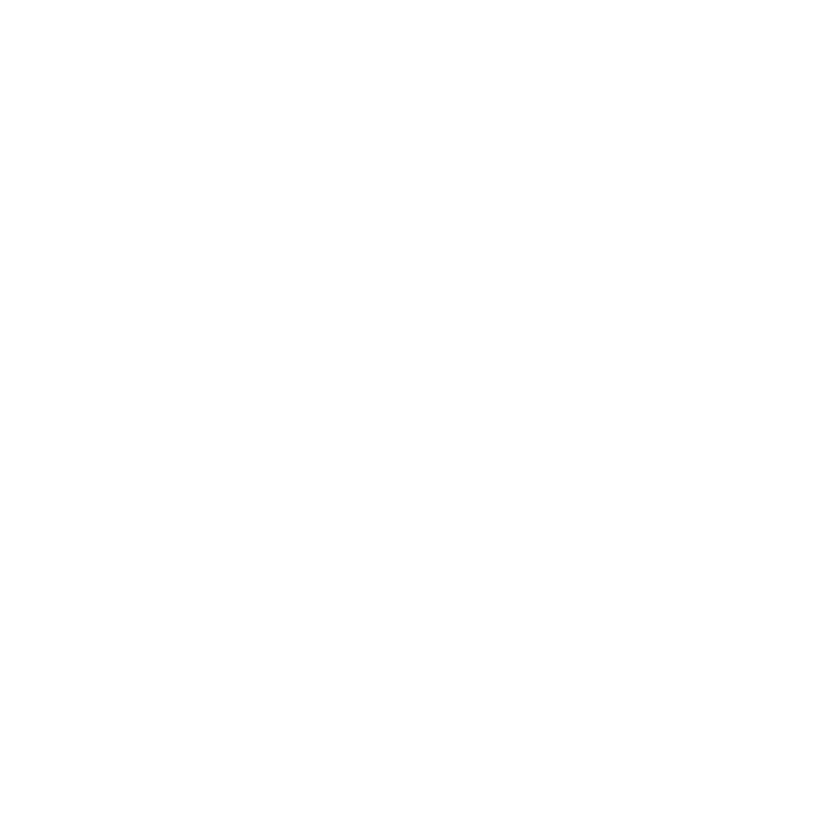

In [12]:
plot3D::scatter3D(rotated_data[,1],rotated_data[,2],rotated_data[,3] , pch=20, bty='g',phi=0,cex=2,ticktype='detailed',
                 colkey=FALSE, col = mycol, xlab="First PC", ylab="Second PC", zlab="Third PC")

**Answer 3**
The spread of the class is fairly intertwined indicating that principal components don't segregate the response. 

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/ML0151EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/ML0151EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0151EN_DSX)

### Thank you for completing this exercise!

Notebook created by: Jag Rangrej

<hr>
Copyright &copy; 2017 [IBM Cognitive Class](https://cocl.us/ML0151EN_cclab_cc). This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).